In [21]:
from nt_xent import NTXentLoss
import torch
from PIL import Image
import torchvision
import torch.nn as nn
from torchvision import transforms
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [5]:
def imshow(img, is_unnormlize=False):
    print(img.shape)
    if is_unnormlize:
        img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))
    # plt.imshow(img)
    plt.show()

In [6]:
def crop(img, size=20):
    res = []
    height = img.shape[0]
    width = img.shape[1]
    for i in range(height // size):
        for j in range(width // size):
            x = size * i
            y = size * j
            xs = min(x + size, height)
            ys = min(y + size, width)
            part = img[x:xs, y:ys]
            res.append(part)
    return np.array(res)

In [7]:
filename = "2395"
image_path = "dataset/label_in_wild/images/"
mask_path = "dataset/label_in_wild/masks/"
img = Image.open(image_path + filename + ".jpg")

img_size = 100
npimg = np.array(img)
patches = crop(npimg, img_size)

print(patches.shape)

(144, 100, 100, 3)


(900, 1600, 3)
(3, 900, 1600)
(3, 100, 100)


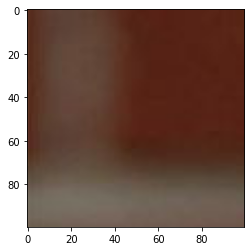

(3, 100, 100)


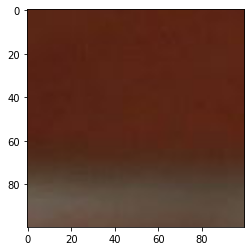

(3, 100, 100)


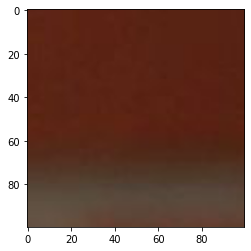

(3, 100, 100)


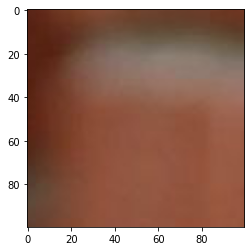

(3, 100, 100)


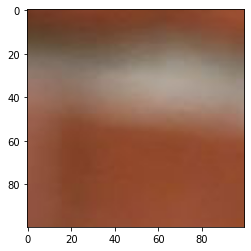

(3, 100, 100)


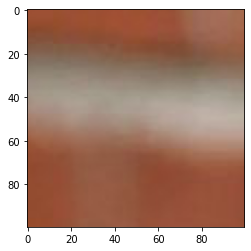

(3, 100, 100)


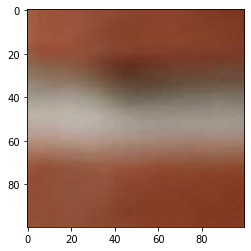

(3, 100, 100)


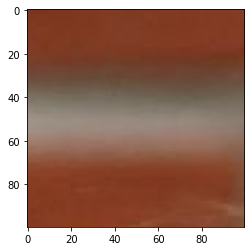

(3, 100, 100)


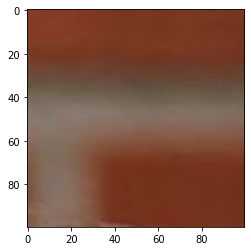

(3, 100, 100)


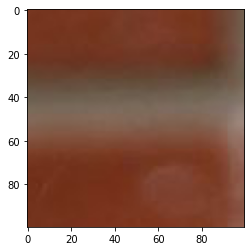

(3, 100, 100)


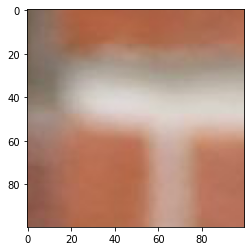

(3, 100, 100)


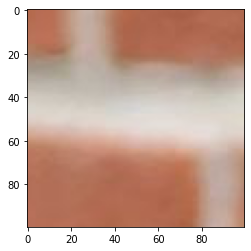

(3, 100, 100)


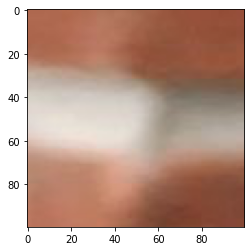

(3, 100, 100)


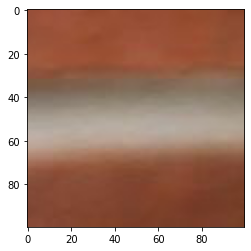

(3, 100, 100)


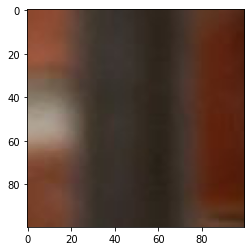

(3, 100, 100)


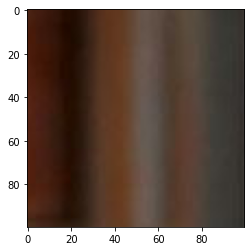

(3, 100, 100)


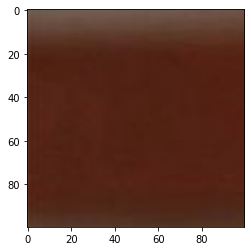

(3, 100, 100)


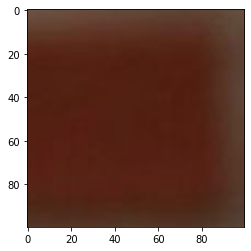

(3, 100, 100)


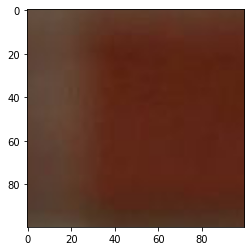

(3, 100, 100)


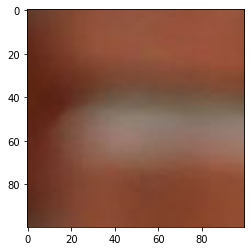

(3, 100, 100)


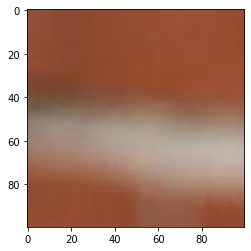

(3, 100, 100)


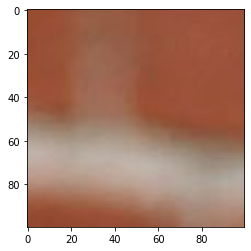

(3, 100, 100)


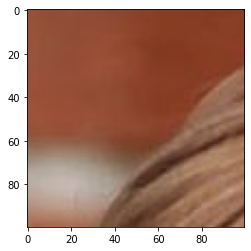

(3, 100, 100)


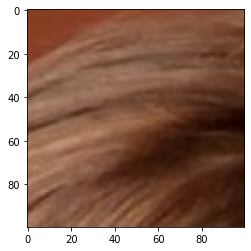

(3, 100, 100)


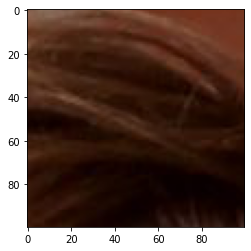

(3, 100, 100)


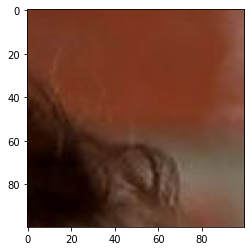

(3, 100, 100)


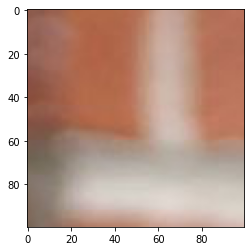

(3, 100, 100)


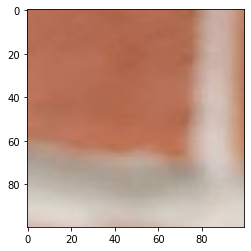

(3, 100, 100)


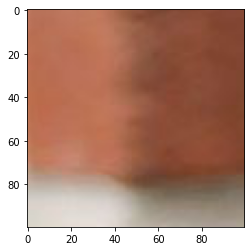

(3, 100, 100)


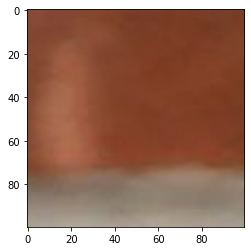

(3, 100, 100)


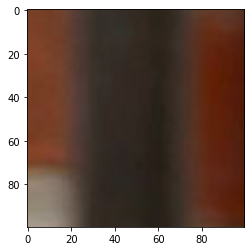

(3, 100, 100)


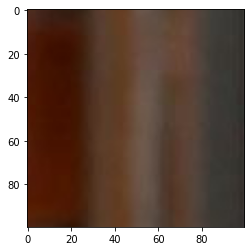

(3, 100, 100)


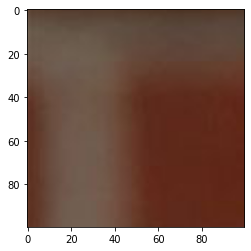

(3, 100, 100)


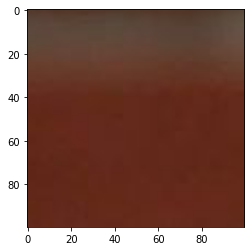

(3, 100, 100)


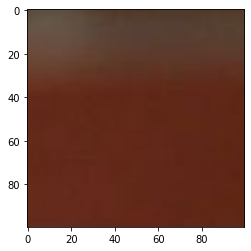

(3, 100, 100)


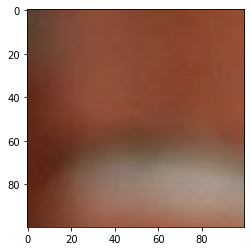

(3, 100, 100)


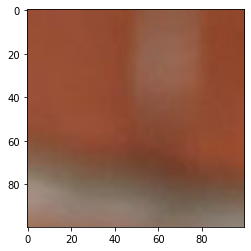

(3, 100, 100)


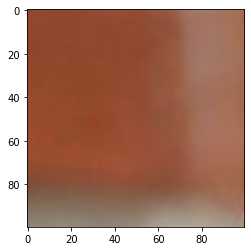

(3, 100, 100)


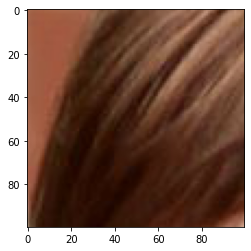

(3, 100, 100)


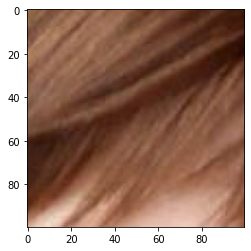

(3, 100, 100)


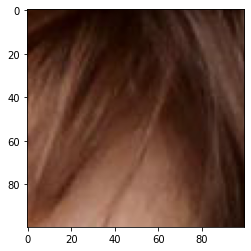

(3, 100, 100)


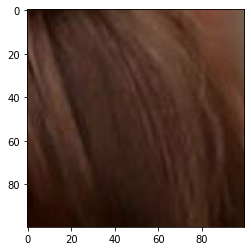

(3, 100, 100)


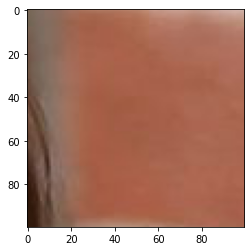

(3, 100, 100)


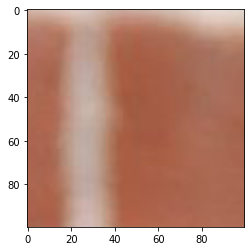

(3, 100, 100)


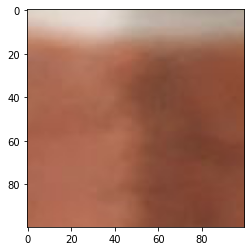

(3, 100, 100)


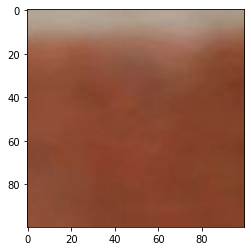

(3, 100, 100)


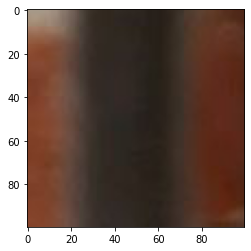

(3, 100, 100)


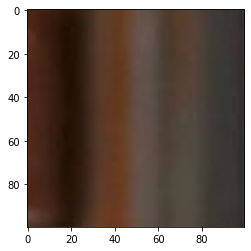

(3, 100, 100)


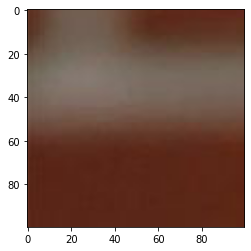

(3, 100, 100)


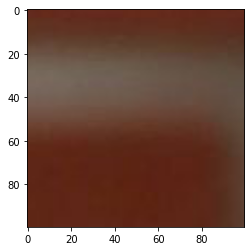

(3, 100, 100)


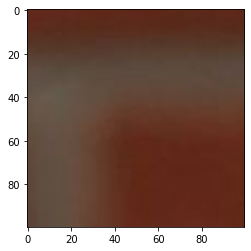

(3, 100, 100)


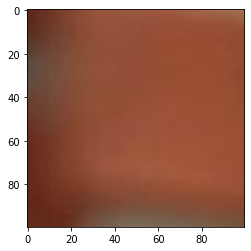

(3, 100, 100)


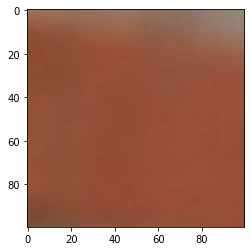

(3, 100, 100)


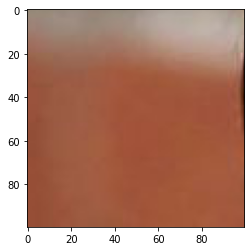

(3, 100, 100)


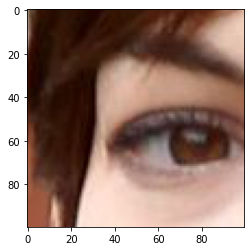

(3, 100, 100)


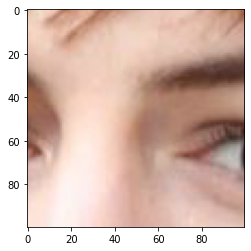

(3, 100, 100)


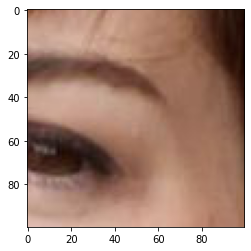

(3, 100, 100)


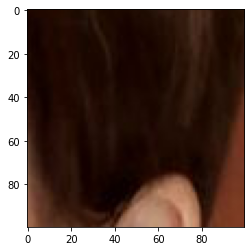

(3, 100, 100)


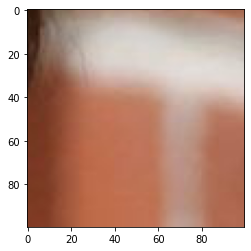

(3, 100, 100)


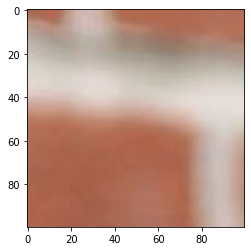

(3, 100, 100)


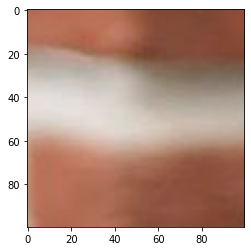

(3, 100, 100)


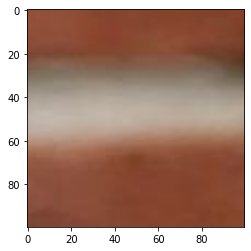

(3, 100, 100)


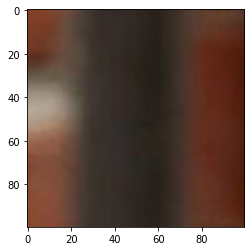

(3, 100, 100)


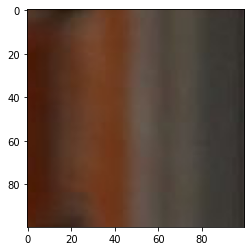

(3, 100, 100)


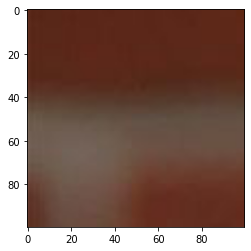

(3, 100, 100)


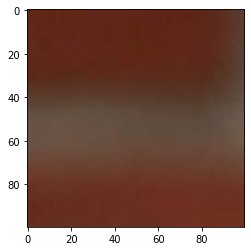

(3, 100, 100)


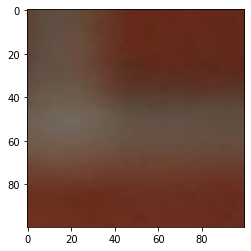

(3, 100, 100)


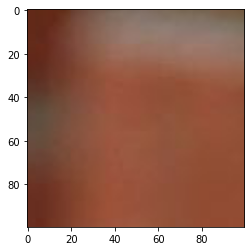

(3, 100, 100)


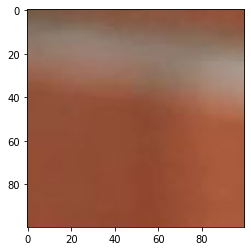

(3, 100, 100)


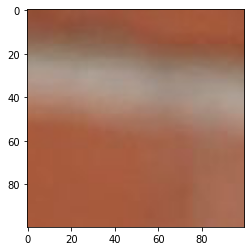

(3, 100, 100)


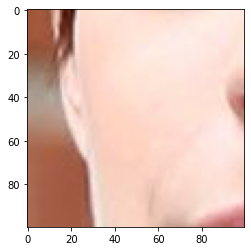

(3, 100, 100)


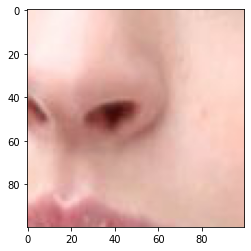

(3, 100, 100)


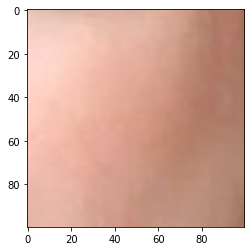

(3, 100, 100)


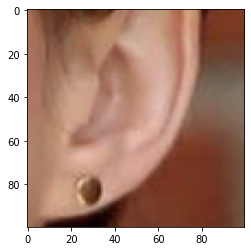

(3, 100, 100)


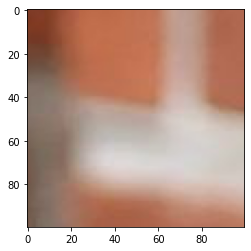

(3, 100, 100)


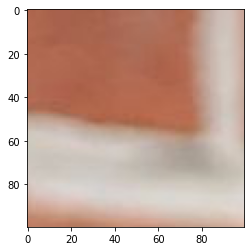

(3, 100, 100)


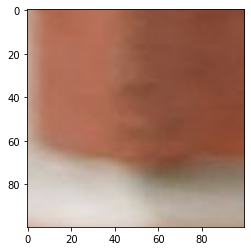

(3, 100, 100)


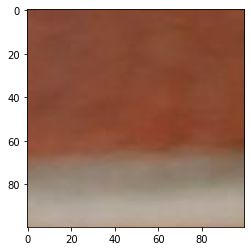

(3, 100, 100)


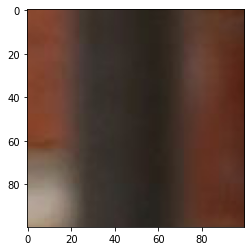

(3, 100, 100)


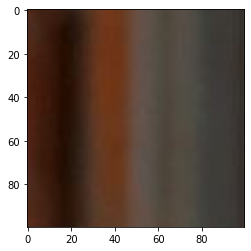

(3, 100, 100)


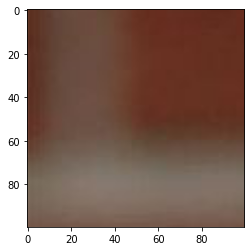

(3, 100, 100)


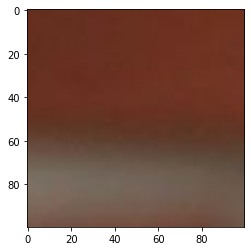

(3, 100, 100)


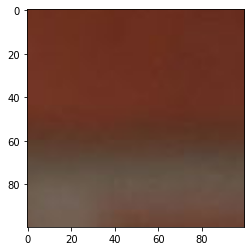

(3, 100, 100)


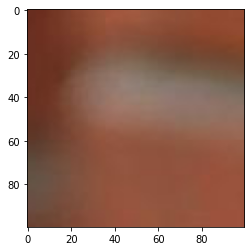

(3, 100, 100)


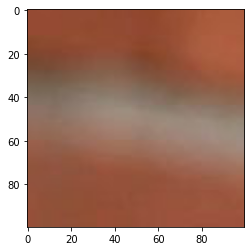

(3, 100, 100)


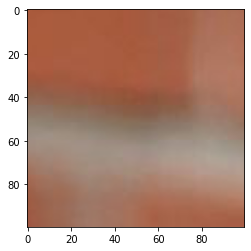

(3, 100, 100)


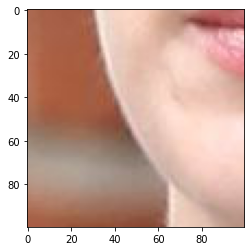

(3, 100, 100)


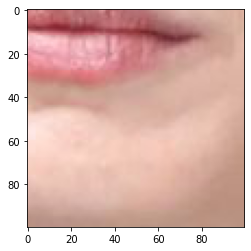

(3, 100, 100)


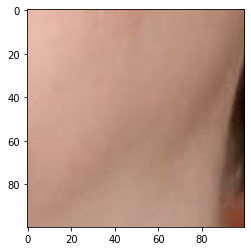

(3, 100, 100)


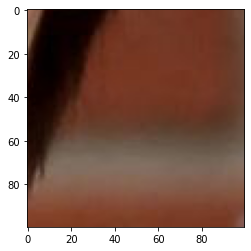

(3, 100, 100)


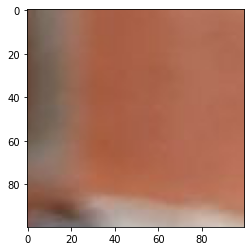

(3, 100, 100)


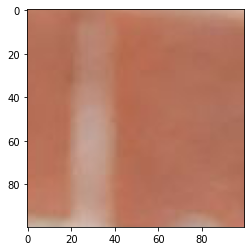

(3, 100, 100)


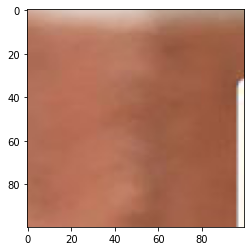

(3, 100, 100)


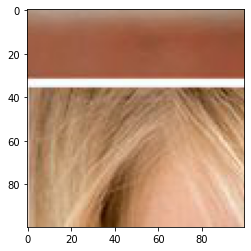

(3, 100, 100)


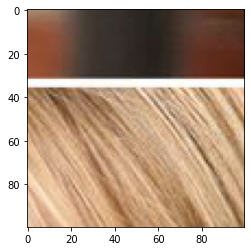

(3, 100, 100)


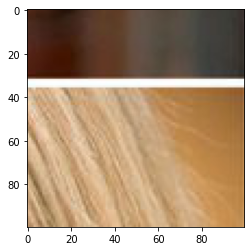

(3, 100, 100)


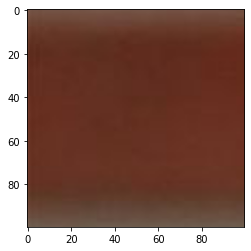

(3, 100, 100)


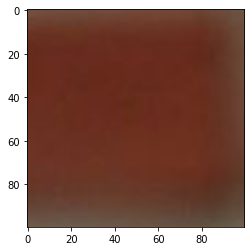

(3, 100, 100)


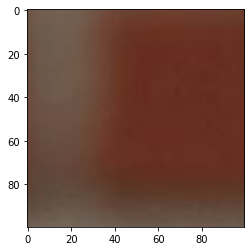

(3, 100, 100)


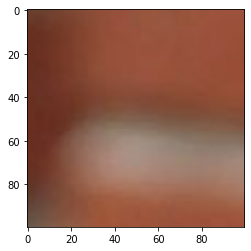

(3, 100, 100)


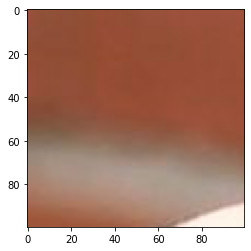

(3, 100, 100)


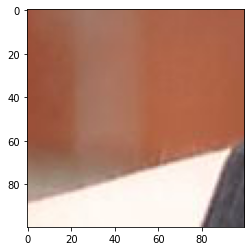

(3, 100, 100)


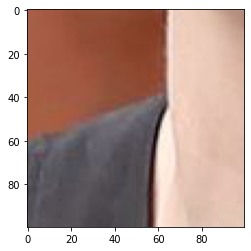

(3, 100, 100)


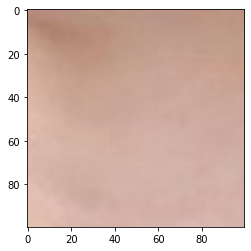

(3, 100, 100)


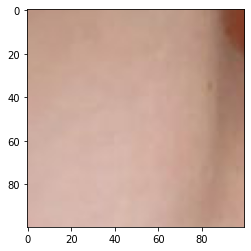

(3, 100, 100)


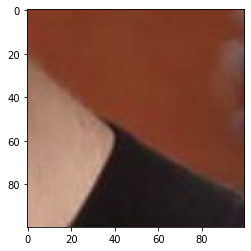

(3, 100, 100)


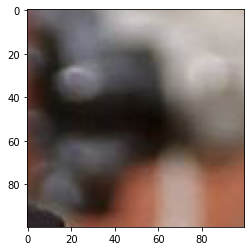

(3, 100, 100)


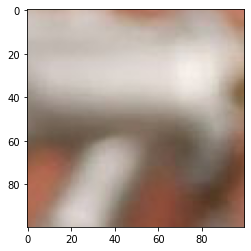

(3, 100, 100)


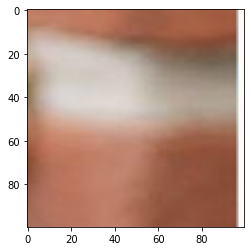

(3, 100, 100)


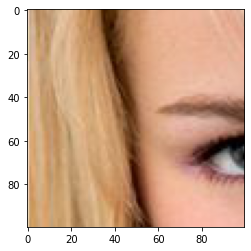

(3, 100, 100)


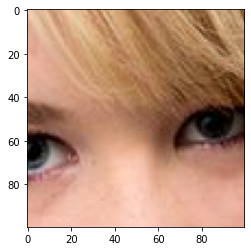

(3, 100, 100)


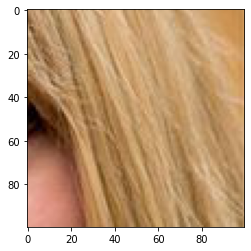

(3, 100, 100)


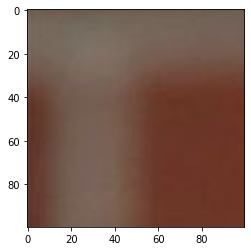

(3, 100, 100)


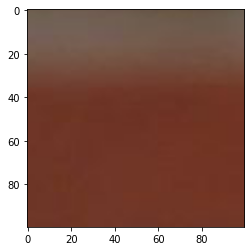

(3, 100, 100)


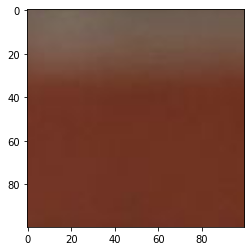

(3, 100, 100)


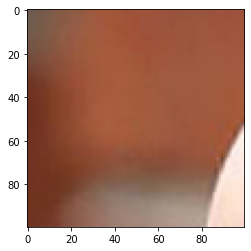

(3, 100, 100)


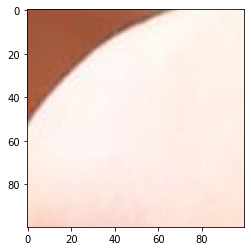

(3, 100, 100)


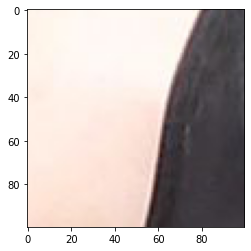

(3, 100, 100)


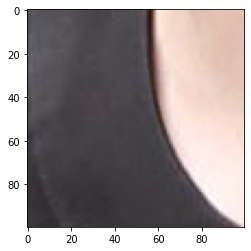

(3, 100, 100)


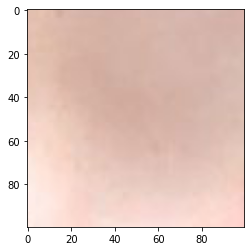

(3, 100, 100)


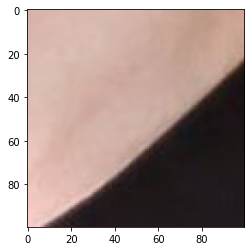

(3, 100, 100)


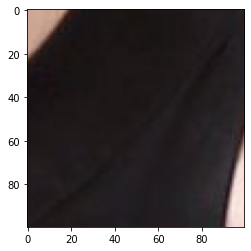

(3, 100, 100)


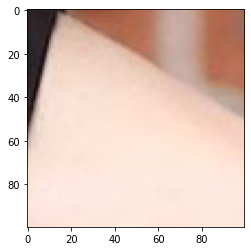

(3, 100, 100)


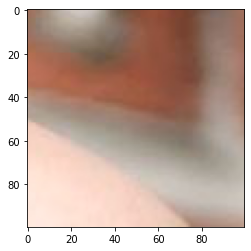

(3, 100, 100)


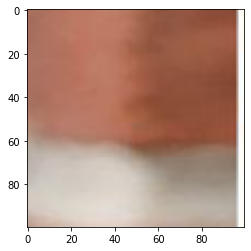

(3, 100, 100)


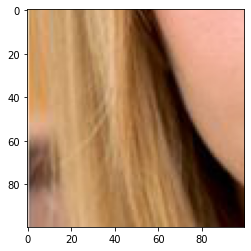

(3, 100, 100)


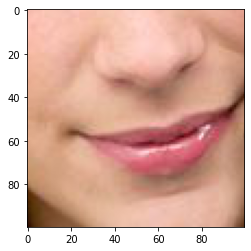

(3, 100, 100)


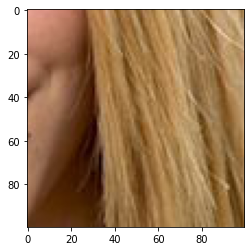

(3, 100, 100)


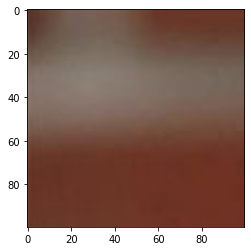

(3, 100, 100)


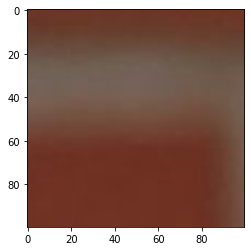

(3, 100, 100)


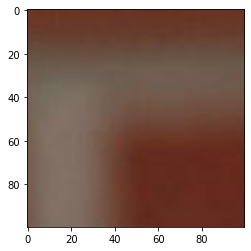

(3, 100, 100)


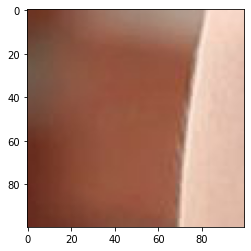

(3, 100, 100)


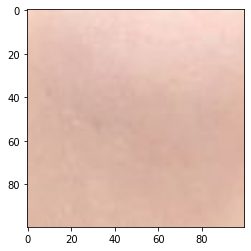

(3, 100, 100)


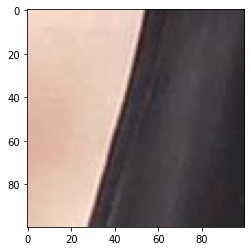

(3, 100, 100)


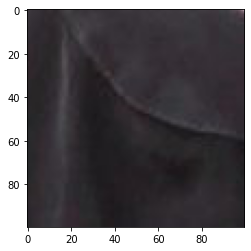

(3, 100, 100)


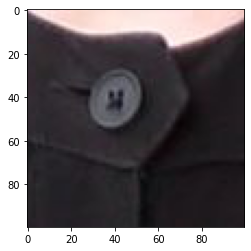

(3, 100, 100)


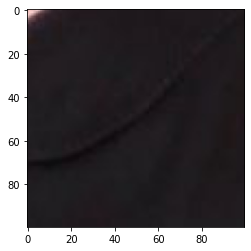

(3, 100, 100)


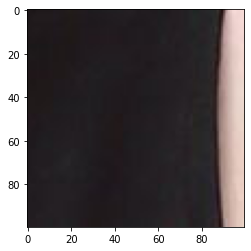

(3, 100, 100)


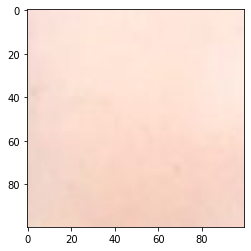

(3, 100, 100)


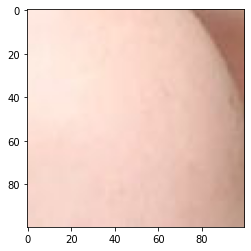

(3, 100, 100)


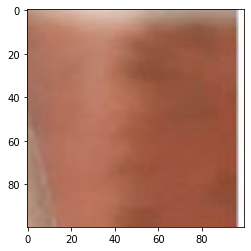

(3, 100, 100)


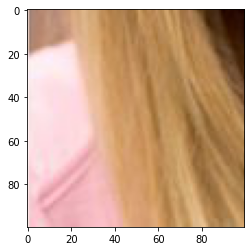

(3, 100, 100)


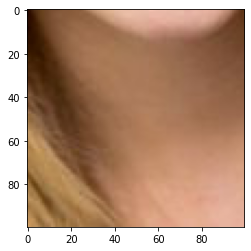

(3, 100, 100)


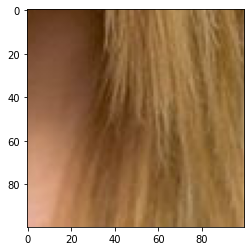

In [19]:
print(npimg.shape)
trans = np.transpose(npimg, (2, 0, 1))
print(trans.shape)

for i in range (0, 144):
    imshow(np.transpose(patches[i], (2, 0, 1)))

(3, 500, 3200)


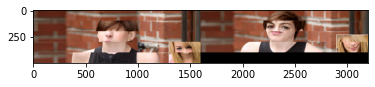

In [9]:
t = torch.tensor(np.transpose(patches, (0, 3, 1, 2)))
grid = utils.make_grid(t, nrow=npimg.shape[1] // 50, padding=0).numpy()
imshow(grid)

In [87]:
class CustomDataset(Dataset):
    def __init__(self, dataset_path, image_count): 

         self.dataset_path = dataset_path
         self.image_count = image_count
         self.transforms = transforms.Compose([
         	transforms.FiveCrop(10),
         	transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
            transforms.Lambda(lambda tensors:
                torch.stack([t for t in tensors]))
           ])

    def __getitem__(self, index):
        image = Image.open(self.dataset_path+str(index)+".jpg")
        
        return self.transforms(image)

    def __len__(self):
        return self.image_count

In [88]:
BATCH_SIZE = 32
temperature = 0.5
training_images_count = 1000


train_data = CustomDataset('/Users/zhuocheng/Documents/GitHub/image-consistency/dataset/cvFinalData/train/', training_images_count)
train_data_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

In [89]:
class SimCLR(nn.Module):
    def __init__(self, encoder, n_features, projection_dim):
        super(SimCLR, self).__init__()

        self.encoder = encoder
        self.n_features = n_features

        self.projector = nn.Sequential(
            nn.Linear(self.n_features, projection_dim, bias=False),
            nn.ReLU()
        )

    def forward(self, x_i, x_j):
        h_i = self.encoder(x_i)
        h_j = self.encoder(x_j)

        z_i = self.projector(h_i)
        z_j = self.projector(h_j)

        z_i = F.normalize(z_i, dim=1)
        z_j = F.normalize(z_j, dim=1)

        return z_i, z_j

In [90]:
encoder = torchvision.models.resnet18(pretrained=False)
n_features = 1000
projection_dim = 128
device = 'cpu'
model = SimCLR(encoder, n_features, projection_dim)

In [91]:
xs = next(iter(train_data_loader))
xis = xs[:, 1, :, :, :]
xjs = xs[:, 1, :, :, :]

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.,

In [92]:
xis.shape

torch.Size([32, 3, 10, 10])

In [61]:
xis = next(iter(train_data_loader))

IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/Users/zhuocheng/miniconda3/envs/sim2/lib/python3.6/site-packages/torch/utils/data/_utils/worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "/Users/zhuocheng/miniconda3/envs/sim2/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/zhuocheng/miniconda3/envs/sim2/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "<ipython-input-57-e3c54e6e4b2a>", line 16, in __getitem__
    return self.transforms(image)[:, 0, :, :, :], self.transforms(image)[:, 1, :, :, :]
IndexError: too many indices for tensor of dimension 4


In [39]:
len(train_data_loader)

32

In [93]:
loss_function = NTXentLoss(device, BATCH_SIZE, temperature, True)  

In [94]:
zi, zj = model(xis, xjs)

In [95]:
loss_function(zi, zj)

tensor(3.3661, grad_fn=<DivBackward0>)

In [96]:
print(zj)

tensor([[0.0000, 0.1931, 0.0000,  ..., 0.0150, 0.0000, 0.0801],
        [0.0000, 0.0293, 0.1212,  ..., 0.2280, 0.0000, 0.0000],
        [0.0000, 0.1815, 0.0000,  ..., 0.0000, 0.0000, 0.0489],
        ...,
        [0.0000, 0.2164, 0.0000,  ..., 0.1092, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0495,  ..., 0.0813, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1994, 0.0000, 0.0482]],
       grad_fn=<DivBackward0>)
